# Plot Coordinate Data

> Thor Besier <br>
> Converted into Python by Alex Woodall <br>
> Auckland Bioengineering Institute <br>
> University of Auckland, New Zealand

It is important to be able to visualise coordinate data while you are working with it. This notebook shows an example of how to extract data from a TRC file and plot specific coordinates (with the average and standard deviation).

Start by importing the libraries needed to run the task.

In [1]:
# Import the necessary libraries
import numpy as np
import sys
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

sys.path.insert(1, r'./../Functions') # add functions to path

from read_trc import read_trc
from plot_avsd import plot_avsd

## Reading in a TRC file

We can read in the desired trc file, containing the coordinate data for each of the markers during a motion capture recording session.

In [2]:
# Read trc file using 'read_trc()'. The file is structured as a dictionary.
# See 'readTRC' in the functions file for more information.
mkr_data, _ = read_trc()

## Observing the structure of the TRC file

The trc file is stored as a dictionary. As such, there are different keys which we can access.

The "data" section contains six different keys, each which can be used in our analysis. We can also look deeper into some of the keys, such as the 'Markers' key. This section contains all the coordinate data for each of the markers placed during the trial.

In [3]:
# View contents of mkr_data
for key,value in mkr_data["Data"].items():
    print (key)

MarkerLabels
ModifiedMarkerLabels
FrameNums
Time
RawData
Markers


In [4]:
# View all of the markers labels in the file
for key,value in mkr_data["Data"]["Markers"].items():
    print(key)

Sternum
Neck
RShoulder
LShoulder
Xiphoid
Thoracic
RAsis
LAsis
RPsis
LPsis
Lumbar
RElbow
RWrist
RRadius
RUlna
LElbow
LWrist
LUlna
LRadius
LThighSuperior
LThighInferior
LThighLateral
LPatella
LShankSuperior
LShankInferior
LShankLateral
RThighSuperior
RThighInferior
RThighLateral
RPatella
RShankSuperior
RShankInferior
RShankLateral
RHeel
RToe
RMidfootMedial
RMidfootLateral
RHindfoot
RMidfootSuperior
RToeMedial
RToeLateral
LHeel
LToe
LMidfootMedial
LMidfootLateral
LHindfoot
LMidfootSuperior
LToeMedial
LToeLateral
LShoulderCenter
Oglobal
RShoulderCenter
Sacral
Xglobal
Yglobal


## Visualising the coordinate data

For an example, we will visualise the marker placed on the left anterior superior iliac spine (LASIS).

In this case, we want to view the x-component of the coordinate data. For simplicity, the standard deviation has been set to 100.

In [5]:
# Pull out some pelvis markers and rename them for convenience
LASI = mkr_data["Data"]["Markers"]["LAsis"]["All"] # Left anterior superior iliac spine

In [6]:
# Make the y-value in the plot just the x-component
y = LASI[:,0]

In [7]:
# Create a vector that represents a standard deviation of 100
sd = np.ones(len(LASI)) * 100

In [8]:
# Create a vector that represents normalised time (from 1 to 100)
x = np.linspace(1,len(LASI),len(LASI))

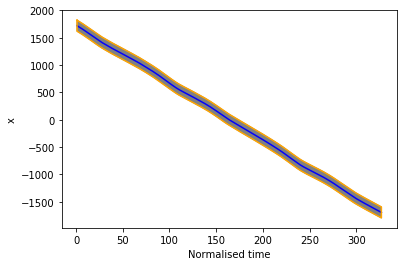

In [9]:
# Plot the coordinate data
plot_avsd(x,y,sd)